In [73]:
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [6]:
df1 = df.sample(n=5000)

In [176]:
X = df1.drop(['ID','default payment next month'], axis = 1)
y = df1['default payment next month']

In [177]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21587,30000,2,2,2,22,0,0,2,0,0,...,27688,28134,29591,28883,5000,0,3000,2000,1300,1500
2564,10000,2,1,2,23,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19470,30000,2,2,1,31,1,2,0,0,2,...,21045,24681,23985,25099,0,1500,4000,0,1500,6000
5787,160000,2,2,1,40,0,0,2,0,0,...,139323,140719,143638,144482,12121,0,5100,10251,5205,0
25811,200000,2,1,1,38,-2,-2,-2,-2,-2,...,5991,7298,9225,4072,6370,5991,7298,2105,10249,0


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=101)

In [179]:
clf = SVC(kernel = 'linear')

In [180]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [181]:
clf.score(X_test,y_test)

0.7595

In [182]:
clf.score(X_train,y_train)

0.796

# GetDummies, Standard Scaling (Std Norm Dist)

In [10]:
sex = pd.get_dummies(X['SEX'],drop_first=True)
X2 = pd.concat([X.drop('SEX', axis = 1),sex], axis = 1)

In [20]:
sex.value_counts()

2
1    2975
0    2025
dtype: int64

In [11]:
marriage = pd.get_dummies(X['MARRIAGE'], drop_first = True)

In [12]:
marriage.value_counts()

1  2  3
0  1  0    2620
1  0  0    2326
0  0  1      47
      0       7
dtype: int64

In [13]:
X['MARRIAGE'].value_counts()


2    2620
1    2326
3      47
0       7
Name: MARRIAGE, dtype: int64

In [72]:
# Drop 0 and 3 from Marriage
df2 = df1.drop(df1[(df1['MARRIAGE']==3)].index)
df3 = df2.drop(df2[(df1['MARRIAGE']==0)].index)
df3['MARRIAGE'].value_counts()

/tmp/ipykernel_1821/3852607499.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2.drop(df2[(df1['MARRIAGE']==0)].index)


2    2620
1    2326
Name: MARRIAGE, dtype: int64

/home/labuser/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


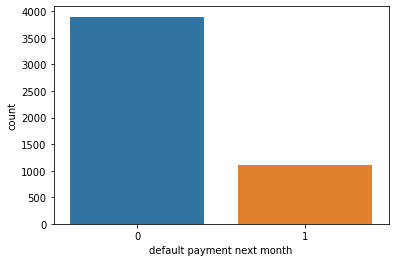

In [74]:
sb.countplot('default payment next month',data=df1)
plt.show()

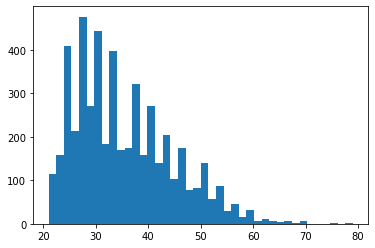

In [75]:
plt.hist(df1['AGE'], bins = 40)
plt.show()

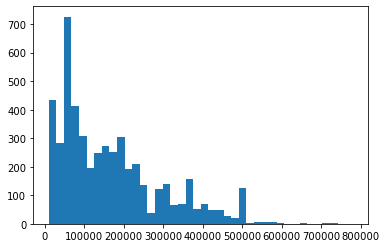

In [77]:
plt.hist(df1['LIMIT_BAL'], bins = 40)
plt.show()

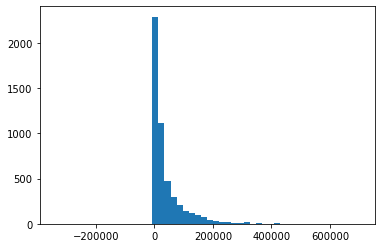

In [94]:
plt.hist(df1['BILL_AMT6'], bins = 50)
plt.show()

##### 

In [108]:
df3['MARRIAGE'].value_counts()

2    2620
1    2326
Name: MARRIAGE, dtype: int64

In [109]:
df3['SEX'].value_counts()

2    2934
1    2012
Name: SEX, dtype: int64

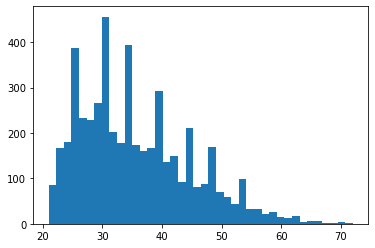

In [111]:
plt.hist(df3['AGE'], bins = 40)
plt.show()

In [119]:
age = pd.cut(df3['AGE'], [20,30,40,50,60,70,80])
age.value_counts()

(20, 30]    1790
(30, 40]    1781
(40, 50]     994
(50, 60]     328
(60, 70]      52
(70, 80]       1
Name: AGE, dtype: int64

In [ ]:
df3 = df3.drop('ID', axis = 1)

In [148]:
df4 = pd.concat([df3.drop('AGE', axis = 1),age], axis = 1)
df4.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE
21587,30000,2,2,2,0,0,2,0,0,0,...,29591,28883,5000,0,3000,2000,1300,1500,0,"(20, 30]"
2564,10000,2,1,2,1,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,"(20, 30]"
19470,30000,2,2,1,1,2,0,0,2,0,...,23985,25099,0,1500,4000,0,1500,6000,0,"(30, 40]"
5787,160000,2,2,1,0,0,2,0,0,2,...,143638,144482,12121,0,5100,10251,5205,0,0,"(30, 40]"
25811,200000,2,1,1,-2,-2,-2,-2,-2,-2,...,9225,4072,6370,5991,7298,2105,10249,0,0,"(30, 40]"


In [165]:
age2 = pd.get_dummies(df4['AGE'],drop_first = True)
age2.value_counts()

(30, 40]  (40, 50]  (50, 60]  (60, 70]  (70, 80]
0         0         0         0         0           1790
1         0         0         0         0           1781
0         1         0         0         0            994
          0         1         0         0            328
                    0         1         0             52
                              0         1              1
dtype: int64

In [166]:
df5 = pd.concat([df3.drop('AGE', axis = 1),age2], axis = 1)
df5.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,"(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
21587,30000,2,2,2,0,0,2,0,0,0,...,3000,2000,1300,1500,0,0,0,0,0,0
2564,10000,2,1,2,1,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19470,30000,2,2,1,1,2,0,0,2,0,...,4000,0,1500,6000,0,1,0,0,0,0
5787,160000,2,2,1,0,0,2,0,0,2,...,5100,10251,5205,0,0,1,0,0,0,0
25811,200000,2,1,1,-2,-2,-2,-2,-2,-2,...,7298,2105,10249,0,0,1,0,0,0,0


In [167]:
X = df5.drop('default payment next month', axis = 1)
y = df5['default payment next month']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

In [173]:
clf.fit(X_train, y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(kernel='linear')

In [174]:
clf.score(X_train,y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7664307381193124

In [175]:
clf.score(X_test,y_test)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Interval', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7728076825878191